In [46]:
import base64
import io
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests,json
import random

# Convert Image to Base64 String

In [9]:
with open("sample_images/dog_with_ball.jpg", "rb") as image_file:
    base64str = base64.b64encode(image_file.read()).decode("utf-8")
print(base64str)

/9j/4AAQSkZJRgABAgAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAGbAmcDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDx9osS5qyIwv41Vu5dknJqzZuJV5NfNyTSuec9SC6wgJzzVGK9eOQ/NVrU0O7IORWJKG35FbUoKUdQSZ08OpF4yAcGsy+mdyeeTWeJHXGOlTozSe9CpKDujOTbdiDDK2RWjbSlVANMWLirNvb7wABRUmmtRWfQR5SelZV7lxyK

# Convert Base64 string to Image

In [10]:
def base64str_to_PILImage(base64str):
    base64_img_bytes = base64str.encode('utf-8')
    base64bytes = base64.b64decode(base64_img_bytes)
    bytesObj = io.BytesIO(base64bytes)
    img = Image.open(bytesObj) 
    return img

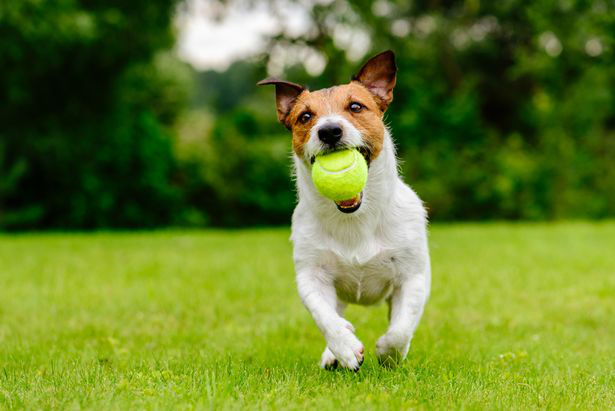

In [11]:
base64str_to_PILImage(base64str)

# Accessing the FastAPI on Local

In [90]:
payload = json.dumps({
  "base64str": base64str,
  "threshold": 0.5
})

response = requests.put("http://127.0.0.1:8000/predict",data = payload)
data_dict = response.json()
print(data_dict)

{'boxes': [[[272.754638671875, 48.12982177734375], [433.81219482421875, 376.4888916015625]], [[312.01104736328125, 149.79376220703125], [367.9121398925781, 207.1046142578125]]], 'classes': ['dog', 'sports ball']}


In [63]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def PILImage_to_cv2(img):
    return np.asarray(img)

def drawboundingbox(img, boxes,pred_cls, rect_th=2, text_size=1, text_th=2):
    img = PILImage_to_cv2(img)
    class_color_dict = {}
    
    #initialize some random colors for each class for better looking bounding boxes
    for cat in pred_cls:
        class_color_dict[cat] = [random.randint(0, 255) for _ in range(3)]
    
    for i in range(len(boxes)):
        cv2.rectangle(img, (int(boxes[i][0][0]), int(boxes[i][0][1])),
                      (int(boxes[i][1][0]),int(boxes[i][1][1])),
                      color=class_color_dict[pred_cls[i]], thickness=rect_th)
        cv2.putText(img,pred_cls[i], (int(boxes[i][0][0]), int(boxes[i][0][1])),  cv2.FONT_HERSHEY_SIMPLEX, text_size, class_color_dict[pred_cls[i]],thickness=text_th)
    plt.figure(figsize=(20,30))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

### Getting image from a local directory

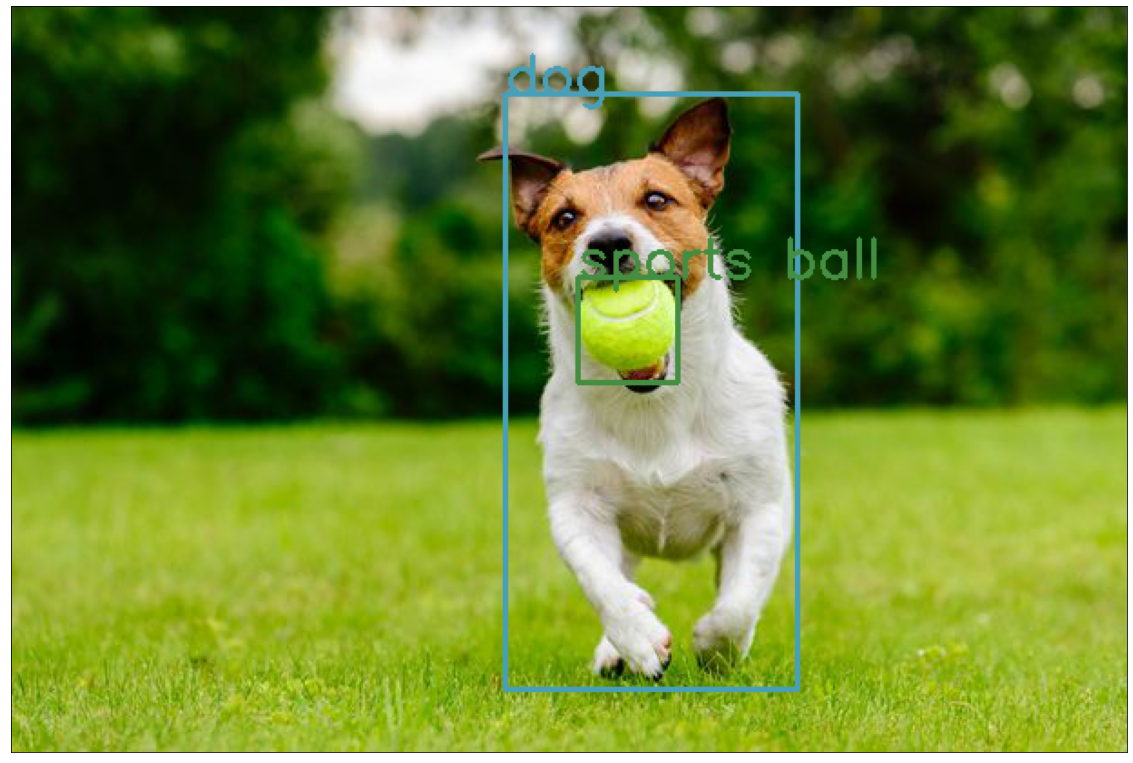

In [71]:
img = Image.open("sample_images/dog_with_ball.jpg")
drawboundingbox(img, data_dict['boxes'], data_dict['classes'])

### Using the base64 representatiton for the visualization as well

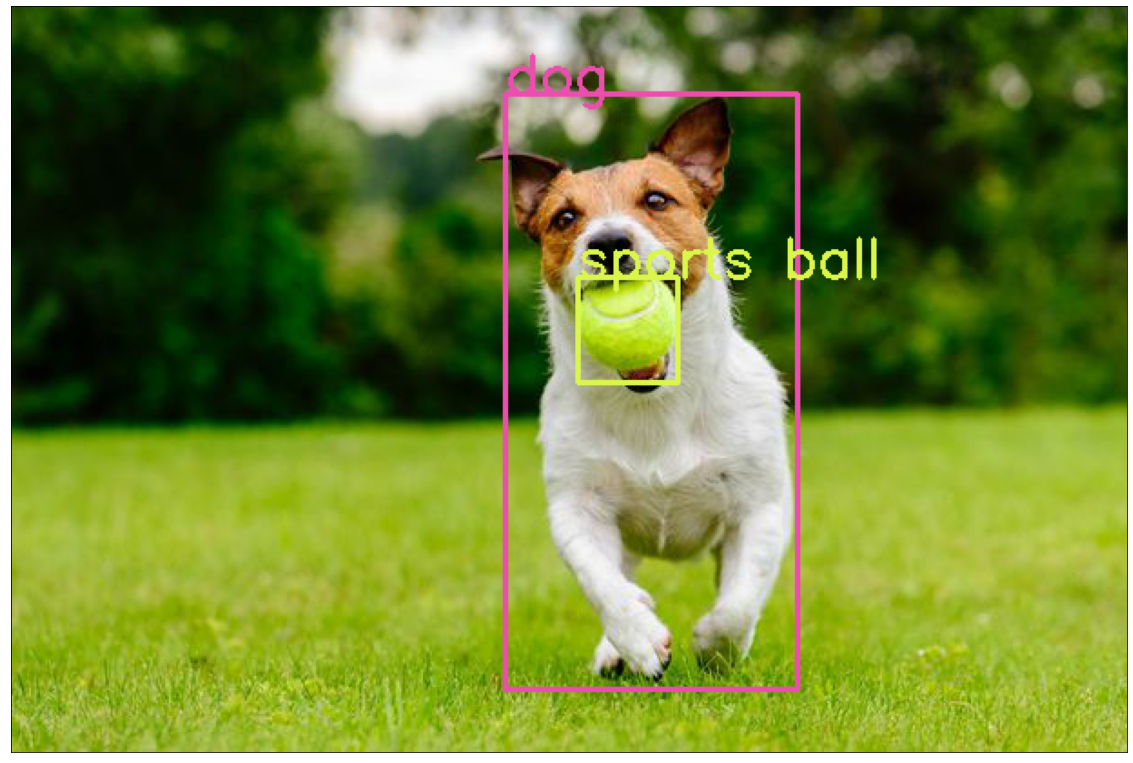

In [72]:
img = base64str_to_PILImage(base64str)
drawboundingbox(img, data_dict['boxes'], data_dict['classes'])

In [100]:
payload = json.dumps({
  "base64str": base64str,
  "threshold": 0.5
})

response = requests.put("http://18.237.28.174/predict",data = payload)
data_dict = response.json()
print(data_dict)

{'boxes': [[[272.754638671875, 48.12983703613281], [433.81219482421875, 376.4888916015625]], [[312.01104736328125, 149.79376220703125], [367.9121398925781, 207.1046142578125]]], 'classes': ['dog', 'sports ball']}


In [ ]:
response.content